## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 5.12: ISM element abundance as a function of condensation temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

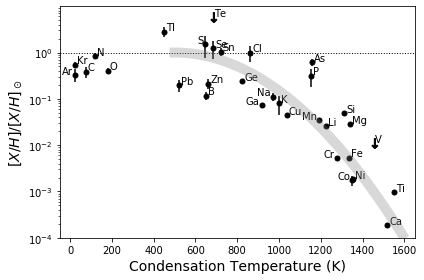

In [4]:
f = open('savage_sembach_table5.txt','r')
header1 = f.readline()
header2 = f.readline()
element = []
Xsolar = []
Tcond = []
deltaX = []
deltaX_lo = []
deltaX_hi = []
for line in f:
    columns = line.split()
    element.append(columns[0])
    Xsolar.append(float(columns[1]))
    Tcond.append(float(columns[2]))
    deltaX.append(float(columns[3]))
    deltaX_hi.append(float(columns[4]))
    deltaX_lo.append(float(columns[5]))
f.close()
Xsolar = np.asarray(Xsolar)
Tcond = np.asarray(Tcond)
deltaX = np.asarray(deltaX)
deltaX_lo = np.asarray(deltaX_lo)
deltaX_hi = np.asarray(deltaX_hi)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.set_xlim(-50,1650.0)
ax.set_ylim(0.0001, 9.9)
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel(r'Condensation Temperature (K)', fontsize=14)
ax.set_ylabel(r'$[X/H] / [X/H]_\odot$', fontsize=14)

arrow = u'$\u2193$'
for i, e in enumerate(element):
    x = Tcond[i]
    logy = deltaX[i]
    y = 10**logy
    ylo = deltaX_lo[i]
    if ylo < 99:
        yerr1 = 10**(logy - ylo)
        yerr2 = 10**(logy + deltaX_hi[i])
        ax.errorbar(x, y, yerr=y-yerr1, color='k', marker='o', markersize=5)
    else:
        ax.plot(x, y, color='k', marker=arrow, markersize=10)
    if (e=='Ar' or e=='S' or e=='Ga' or e=='Mn' or e=='Na' or e=='Cr' or e=='Co'):
        ax.text(x-10, 1.05*y, e, ha='right')
    else:
        ax.text(x+10, 1.05*y, e, ha='left')
plt.plot([-50,1650], [1,1], 'k:', lw=1)

# purely empirical power law eyeball fit to guide the eye
xmin = 500
xmax = 1600
x = np.arange(xmin, xmax, 10)
p = 2
yscale = 4
logy = -yscale * ((x-xmin)/(xmax-xmin))**p
plt.plot(x, 10**logy, color='gray', linestyle='solid', lw=10, alpha=0.3, zorder=99)

fig.tight_layout()
plt.savefig('depletion.pdf')